# Iris Dataset for Machine Learning

## I. Data Acquisition

In [0]:
# import needed libraries 

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam

In [0]:
# import HR csv file
df=pd.read_csv('Iris.csv')

### Plotting Functions

In [0]:
def plotTrainingHist(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.ylim(0,1)
  plt.xlim(0, epoch-1)
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def confMatrix(X_test, y_test, model, regType):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))
  f, ax = plt.subplots(figsize=(13,8))
  model_y_pred1 = model.predict(X_test, verbose=1)
  model_y_pred= model_y_pred1.round(0)
  model_cm = confusion_matrix(y_test,model_y_pred,[0,1])
  sns.heatmap(model_cm, annot=True, fmt='g', cmap="RdBu", xticklabels = ["0", "1"] , yticklabels = ["0", "1"], ax=ax )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(regType + ' : Confusion Matrix', fontsize=20)


## II. Data Cleaning & Preprocessing

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
# Cut 'Iris-' in the Species Feature
df['Species'] = df['Species'].str[5:]

In [48]:
# Validate the number of values in the Feature
df['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

### Seaborn Pairplot

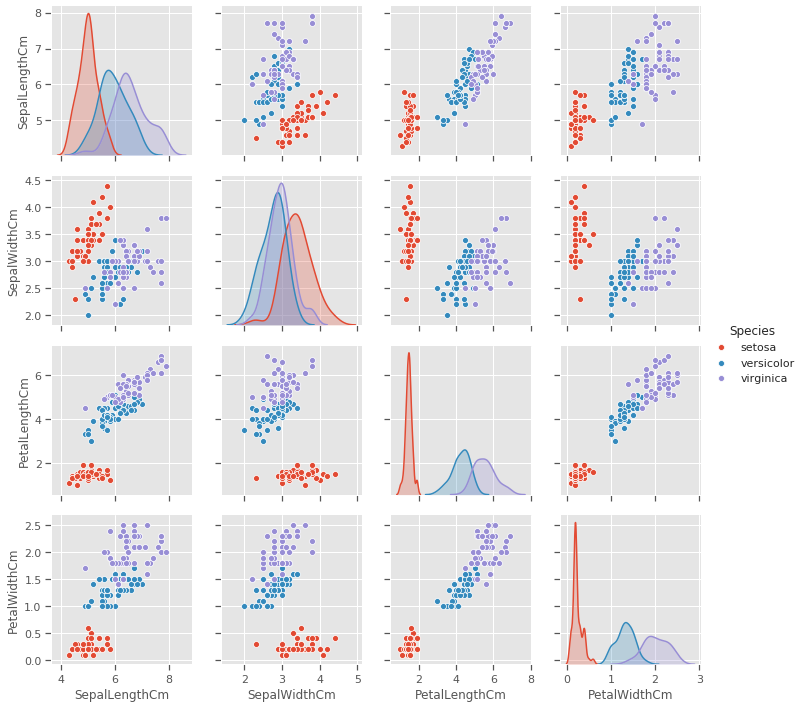

In [49]:
sns.pairplot(df,hue='Species', kind='scatter')

### Histograms of Features

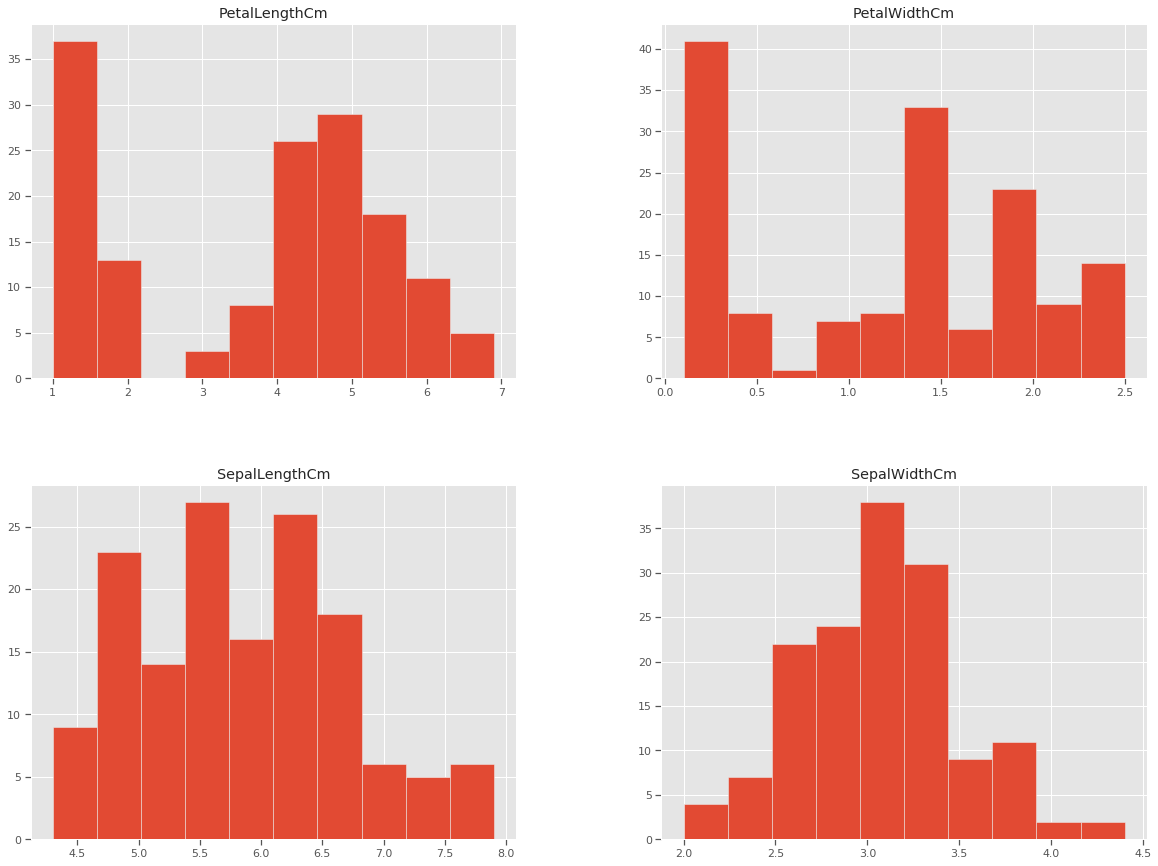

In [50]:
df.hist(bins=10, figsize=(20,15))
plt.show()

In [0]:
# Normalization of the Features
ss = StandardScaler()
scale_features = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
df[scale_features] = ss.fit_transform(df[scale_features])

In [0]:
# One hot Representation of Species
X = df.drop('Species', axis=1).values
categorical_features = ['Species']
df_cat = pd.get_dummies(df[categorical_features])
df = df.drop(categorical_features, axis=1)
df = pd.concat ([df, df_cat], axis=1)
species = ['Species_setosa','Species_versicolor','Species_virginica']
y = df[species].values
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
X_train

array([[-1.02184904e+00, -2.43898725e+00, -1.47092621e-01,
        -2.61192967e-01],
       [ 7.95669016e-01, -1.24957601e-01,  9.90221459e-01,
         7.90590793e-01],
       [ 1.03800476e+00,  5.69251294e-01,  1.10395287e+00,
         1.71090158e+00],
       [ 1.89829664e-01, -1.97618132e+00,  7.05892939e-01,
         3.96171883e-01],
       [ 1.03800476e+00, -1.28197243e+00,  1.16081857e+00,
         7.90590793e-01],
       [-2.94841818e-01, -1.28197243e+00,  8.03701950e-02,
        -1.29719997e-01],
       [ 2.24968346e+00, -1.24957601e-01,  1.33141568e+00,
         1.44795564e+00],
       [ 5.53333275e-01,  5.69251294e-01,  5.35295827e-01,
         5.27644853e-01],
       [-4.16009689e-01, -1.51337539e+00,  2.35044910e-02,
        -1.29719997e-01],
       [ 5.53333275e-01, -8.19166497e-01,  6.49027235e-01,
         7.90590793e-01],
       [ 5.53333275e-01, -5.87763531e-01,  7.62758643e-01,
         3.96171883e-01],
       [-1.14301691e+00, -1.28197243e+00,  4.21564419e-01,
      

### Soft Regression

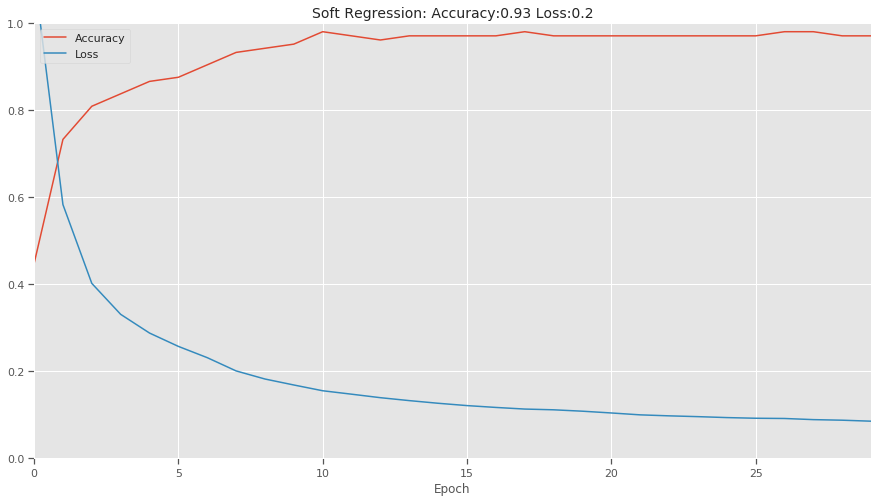

In [55]:
sr_model = Sequential()
sr_model.add(Dense(3,input_shape=(X.shape[1],),activation='softmax'))
sr_model.compile(Adam(lr=0.1),'categorical_crossentropy',metrics=['accuracy'])
history= sr_model.fit(X_train, y_train, epochs=30, verbose=0)
plotTrainingHist(history, 30, 'Soft Regression')

### ANN Regression

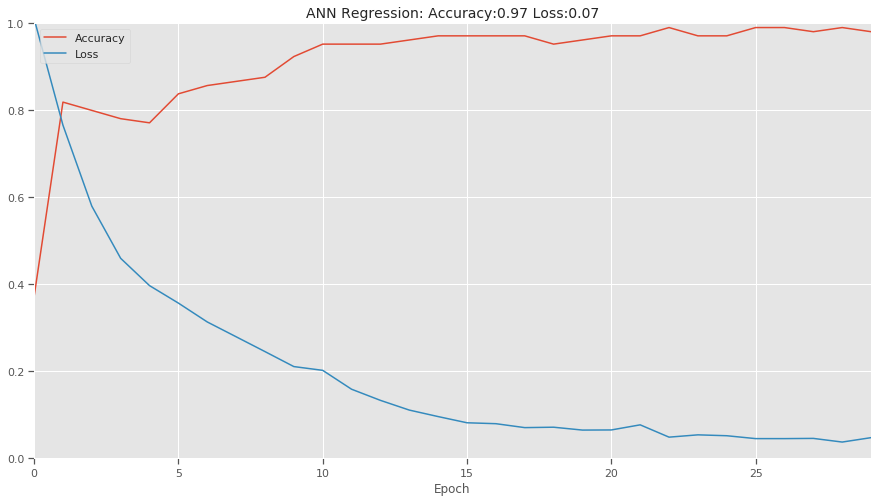

In [56]:
deep_model = Sequential()
deep_model.add(Dense(32,input_shape=(X.shape[1],),activation='relu'))
deep_model.add(Dense(16,input_shape=(X.shape[1],),activation='relu'))
deep_model.add(Dense(3,activation='softmax'))
deep_model.compile(Adam(lr=0.01),'categorical_crossentropy',metrics=['accuracy'])
deep_history = deep_model.fit(X_train, y_train, verbose=0, epochs=100)
plotTrainingHist(deep_history, 30, 'ANN Regression')